In [1]:
edges = [ ('P', 'Q'),('Q', 'R'), ('R', 'S'), ('S', 'P'), ('P', 'R'), ('Q', 'S')]

In [2]:
from qiskit import BasicAer
from qiskit.tools.visualization import plot_histogram
from qiskit.aqua import QuantumInstance
from qiskit.aqua.algorithms import Grover
from qiskit.aqua.components.oracles import TruthTableOracle

from typing import Dict, Tuple, List
from time import time


from graph import graph_types as t
from graph.evaluators import HamiltonianEvaluator

class groversearch:
    def call_grover(truth_map: str, num_vertices: int, shots=1024) -> dict:
       
        start = time()

        oracle = TruthTableOracle(truth_map)
        grover = Grover(oracle)  
        result = grover.run(QuantumInstance(BasicAer.get_backend('qasm_simulator'), shots=shots))

        end = time()
        print('Grover\'s search on n = {} vertices:\nTime elapsed: {}s\n'.format(num_vertices, end - start))
        return result
    def get_truth_map(truth_table: Dict[Tuple[t.edge, ...], bool]) -> str:
        
        binary_repr = ''
        for key, val in truth_table.items():
            binary_repr += str(int(val))  

    
        while not (len(binary_repr) != 0 and len(binary_repr) & (len(binary_repr) - 1) == 0):
            binary_repr += '0'

        return binary_repr
    def run_grovers(graph_edge_set: List[t.edge], plot: bool = False, graph_str: str = None) -> List[t.edge]:
       
        if graph_str is not None:
            print(graph_str)

        evaluator = HamiltonianEvaluator(graph_edge_set)
        truth_table = evaluator.generate_truth_table()
        truth_map = groversearch.get_truth_map(truth_table)

        if len(truth_map) <= 1:
            print('Unable to run Grover\'s search. Not enough edge combinations.\n')
            return []

        result = groversearch.call_grover(truth_map, len(evaluator.vertices))

        if plot:
            plot_histogram(result['measurement'])  # One for Jupyter
    
            print(result['circuit'].draw())

        
        index = int(result['top_measurement'], 2)
        result = list(truth_table.items())[index]

        
        if result[1]:
            return list(result[0])
        else:
            return []

In [3]:
groversearch.run_grovers(edges, plot=True)

Grover's search on n = 4 vertices:
Time elapsed: 0.6967532634735107s

      ┌───┐┌────┐┌─┐         
 q_0: ┤ H ├┤0   ├┤M├─────────
      ├───┤│    │└╥┘┌─┐      
 q_1: ┤ H ├┤1   ├─╫─┤M├──────
      ├───┤│    │ ║ └╥┘┌─┐   
 q_2: ┤ H ├┤2   ├─╫──╫─┤M├───
      ├───┤│    │ ║  ║ └╥┘┌─┐
 q_3: ┤ H ├┤3 Q ├─╫──╫──╫─┤M├
      └───┘│    │ ║  ║  ║ └╥┘
 q_4: ─────┤4   ├─╫──╫──╫──╫─
           │    │ ║  ║  ║  ║ 
 q_5: ─────┤5   ├─╫──╫──╫──╫─
           │    │ ║  ║  ║  ║ 
 q_6: ─────┤6   ├─╫──╫──╫──╫─
           └────┘ ║  ║  ║  ║ 
c0: 4/════════════╩══╩══╩══╩═
                  0  1  2  3 


[('Q', 'R'), ('S', 'P'), ('P', 'R'), ('Q', 'S')]

In [4]:
evl = HamiltonianEvaluator(edges)
truth_table = evl.generate_truth_table()
truth_table

{(('P', 'Q'), ('Q', 'R'), ('R', 'S'), ('S', 'P')): True,
 (('P', 'Q'), ('Q', 'R'), ('R', 'S'), ('P', 'R')): False,
 (('P', 'Q'), ('Q', 'R'), ('R', 'S'), ('Q', 'S')): False,
 (('P', 'Q'), ('Q', 'R'), ('S', 'P'), ('P', 'R')): False,
 (('P', 'Q'), ('Q', 'R'), ('S', 'P'), ('Q', 'S')): False,
 (('P', 'Q'), ('Q', 'R'), ('P', 'R'), ('Q', 'S')): False,
 (('P', 'Q'), ('R', 'S'), ('S', 'P'), ('P', 'R')): False,
 (('P', 'Q'), ('R', 'S'), ('S', 'P'), ('Q', 'S')): False,
 (('P', 'Q'), ('R', 'S'), ('P', 'R'), ('Q', 'S')): True,
 (('P', 'Q'), ('S', 'P'), ('P', 'R'), ('Q', 'S')): False,
 (('Q', 'R'), ('R', 'S'), ('S', 'P'), ('P', 'R')): False,
 (('Q', 'R'), ('R', 'S'), ('S', 'P'), ('Q', 'S')): False,
 (('Q', 'R'), ('R', 'S'), ('P', 'R'), ('Q', 'S')): False,
 (('Q', 'R'), ('S', 'P'), ('P', 'R'), ('Q', 'S')): True,
 (('R', 'S'), ('S', 'P'), ('P', 'R'), ('Q', 'S')): False}

In [5]:
for edges, is_hamiltonian in truth_table.items():
    if is_hamiltonian:
        print(edges)

(('P', 'Q'), ('Q', 'R'), ('R', 'S'), ('S', 'P'))
(('P', 'Q'), ('R', 'S'), ('P', 'R'), ('Q', 'S'))
(('Q', 'R'), ('S', 'P'), ('P', 'R'), ('Q', 'S'))


In [6]:
import math

truth_map = groversearch.get_truth_map(truth_table)
shots = math.ceil(math.sqrt(len(truth_map)))
shots

4

In [7]:
result = groversearch.call_grover(truth_map, len(evl.vertices),
                                  shots=1024)

Grover's search on n = 4 vertices:
Time elapsed: 0.15833020210266113s



In [8]:
from qiskit.tools.visualization import plot_histogram

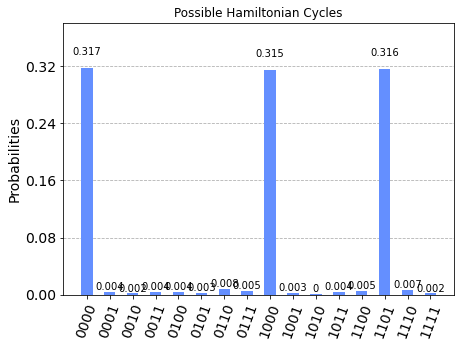

In [9]:
plot_histogram(result['measurement'], title='Possible Hamiltonian Cycles')

In [10]:
combinations_set = list(truth_table.keys())
enumeration_to_edges = lambda bin_combo: combinations_set[int(str(bin_combo), 2)]

In [11]:
combo = input('Input the edge combination: ')
print(enumeration_to_edges(combo))

Input the edge combination: 0
(('P', 'Q'), ('Q', 'R'), ('R', 'S'), ('S', 'P'))
